In [ ]:
### 1. Key Facial Points Detection
- The dataset consists of x and y coordinates of 15 facial key points.
- Input images are 96 x 96 pixels
- Images are greyscaled or single channel

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import PIL
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121 # 2017 architecture
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Facial Key Points Detection:

In [8]:
# Load data
keyfacial_df = pd.read_csv('./1.2 Emotion AI Dataset/Emotion AI Dataset/data.csv')
# image column contains pixel values(0to255) for each row

In [9]:
keyfacial_df #2140 rows × 31 columns

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [10]:
keyfacial_df.info() # no missing values!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [11]:
# check if null values exist
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [12]:
print(keyfacial_df['Image'].shape, keyfacial_df['mouth_left_corner_x'].shape)

(2140,) (2140,)


In [13]:
# our image column contains string values, saperated with space
# we will convert this into numpy array using np.frontstring and
# convert the obtained 1D array into 2D array of shape (96,96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x : np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [14]:
keyfacial_df['Image'][0].shape

(96, 96)

In [15]:
# print(keyfacial_df['mouth_center_top_lip_x'].min(),'\n',
#       keyfacial_df['mouth_center_top_lip_x'].mean(),'\n',
#       keyfacial_df['mouth_center_top_lip_x'].median(),'\n',
#       keyfacial_df['mouth_center_top_lip_x'].max())
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


### Image Visualization

### Point to Note :
- X coordinate are in even column numbers(starting from 0)
- Y coordinate values are in odd column numbers.

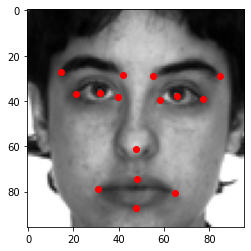

In [16]:
# Plot any random image from dataset along with facial keypoints
# image data is obtained from keyfacial_df['Image'] 
# there are 30 + 1 columns 15, 15 for each X and Y coordinates
# those 15 X and Y coordinates for corresponding image is obtained by using a for loop
# which increments from 1 to 31 by 2.For example, in the first iteration j would be 1, followed by 3 and so on.
#since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
#we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.
#in the first iteration df[i][j-1] would be df[i][0] refering the value in 1st column(x-coordinate) of the image in 'i' row.
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap ='gray')
for j in range(1, 31, 2): # no. of cols = 30, so from 1 to 30 with jump of 2 plot all X cords and Y cords
    plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'ro') # [j-1] mean x [j] mean y
    plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j])

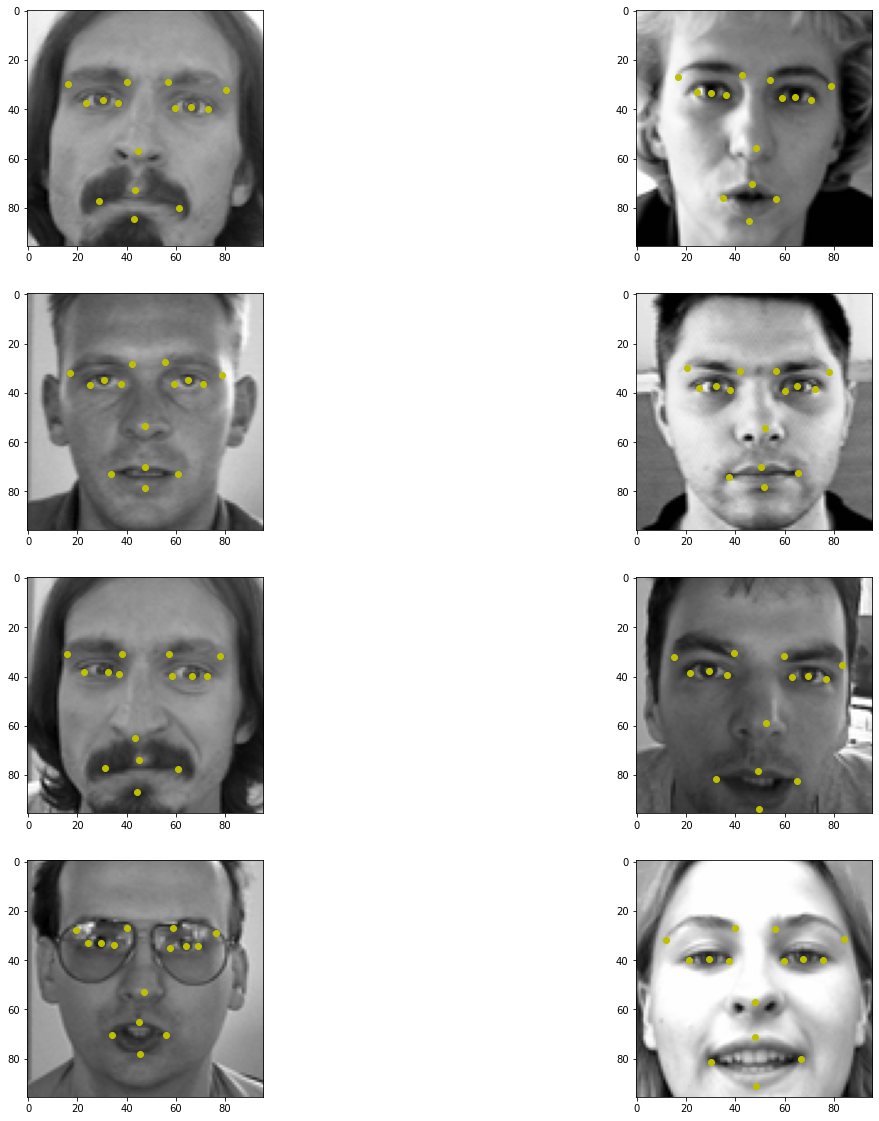

In [17]:
# display more images
# this is known as sanity check  
fig = plt.figure(figsize = (20,20))
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    image = plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j],'yo')

### Image Augmentation
- As we know deep learning is hungary of datas
- Image Augmentation is used to generate more datas using input data
- It may flip image horizontally, vertically, zoom it, zoom out etc..


In [30]:
# creating new copy of the dataframe
import copy 
keyfacial_df_copy = copy.copy(keyfacial_df)

In [31]:
# obtain columns in the dataframe
columns = keyfacial_df_copy.columns[:-1] #ignoring Image column
len(columns)

30

In [32]:
# horizontal flip  - flip the images along y-axis 
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x : np.flip(x , axis = 1))

# on flipping X coords with change but Y won't, we will subtract out initial x coord values from the width of the image
for i in range(len(columns)):
    if i%2 == 0: # selecting even cols that are x cols
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x : 96. - float(x))

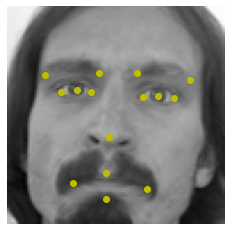

In [38]:
# original Image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.axis('off')
    plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'yo')

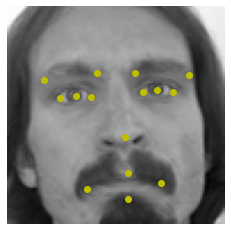

In [40]:
# horizonatally flipped image
plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.axis('off')
    plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'yo')

In [42]:
# concatenate original and flipped image 
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [43]:
augmented_df.shape

(4280, 31)

In [44]:
# augmentation using change in brightness
# multiply pixel values by random values between 1.5 to 2 increase the brightness of the image
# we clip the value btw 0 and 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

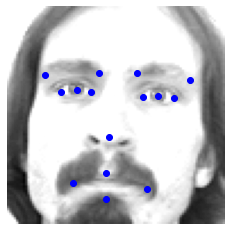

In [46]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.axis('off')
    plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'bo')

In [48]:
keyfacial_df_copy = copy.copy(keyfacial_df)

In [50]:
# vertically flip  - flip the images along x-axis 
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x : np.flip(x , axis = 0))

# on flipping X coords with change but Y won't, we will subtract out initial x coord values from the width of the image
for i in range(len(columns)):
    if i%2 != 0: # selecting even cols that are x cols
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x : 96. - float(x))

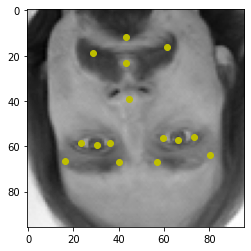

In [52]:
# vertically flipped image
plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
    plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'yo')

In [54]:
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(10700, 31)

## Data Normalization and Data Prepration

In [60]:
# Obtain the value of images which is present in the 31st columns
# 30 is the last column as indexing is from 0
img = augmented_df[:,30]
len(img)

10700

In [61]:
# Normalize The image
img = img / 255.

#create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96,1))

# iterate through the image list and add image values to the empty array
# after expanding its dimension from (96,96) to (96,96,1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float 32
X = np.asarray(X).astype(np.float32)
X.shape

(10700, 96, 96, 1)

In [62]:
# print(X[0])
print(len(X[0]))

96


In [63]:
# Values of X n Y coords which are to used as target
y = augmented_df[:, :30]
y = np.asarray(y).astype(np.float32)
y.shape

(10700, 30)

In [64]:
y[0]

array([66.03356 , 39.002274, 30.227007, 36.421677, 59.582077, 39.647423,
       73.13035 , 39.969997, 36.35657 , 37.3894  , 23.452871, 37.3894  ,
       56.953262, 29.033648, 80.22713 , 32.228138, 40.227608, 29.002321,
       16.356379, 29.64747 , 44.42057 , 57.066803, 61.19531 , 79.97017 ,
       28.614496, 77.38899 , 43.312603, 72.935455, 43.130707, 84.48577 ],
      dtype=float32)

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8560, 96, 96, 1), (2140, 96, 96, 1), (8560, 30), (2140, 30))

In [67]:
# Dense ANN mean all the neuron in a layer is fully connected to all neurons in the subsequent layer

### RESNET (RESIDUAL NETWORK)
- As CNNs grows deeper, vanishing gradient tend to occurs which negatively impact network performance.
- Vanishing Gradient problem occurs when the gradient is back-propagated to earlier layers which results in a very small gradient.
- Residual Neural Network includes 'skip connection' feature which enables training of 152 layers without vanishing gradient issues.
- RESNET works by adding 'identity mappings' on top of CNN.
- ImageNet contains 11M images and 11000 categories.
- ImageNet is used to train ResNet deep Network.

### Building ResNet Model to Detect key Facial Points

In [70]:
# RESBLOCK :=> input -> Convolution Block -> Identity Block -> Identity Block -> output
def res_block(X, filters,stage):
    # Convolution Block
    X_copy = X

    f1, f2, f3 = filters
    
    # Main path
    X = Conv2D(f1,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2,(3,3), strides = (1,1), padding= 'same', name = 'res_' + str(stage) + '_conv_b', kernel_initializer = glorot_uniform(seed = 0))(X)

    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3,(1,1),strides = (1,1), name ='res_' + str(stage) + '_conv_c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_conv_c')(X)
   
    # Short path
    
    X_copy = Conv2D(f3,(1,1), strides =(1,1), name = 'res_'+str(stage) +'_conv_copy', kernel_initializer = glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis = 3, name='bn_'+str(stage)+'_conv_copy')(X_copy)
    
    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # Identity BLock 1
    X_copy = X 
    
    # main path

    X = Conv2D(f1,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_identity_1_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2,(3,3), strides = (1,1), padding= 'same', name = 'res_' + str(stage) + '_identity_1_b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_identity_1_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, (1,1),strides = (1,1), name ='res_' + str(stage) + '_identity_1_c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_identity_1_c')(X)
    
    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # identity block 2
    X_copy = X 
    
    # main path
    X = Conv2D(f1,(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_identity_2_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2,(3,3), strides = (1,1), padding= 'same', name = 'res_' + str(stage) + '_identity_2_b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_identity_2_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, (1,1),strides = (1,1), name ='res_' + str(stage) + '_identity_2_c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage) + '_identity_2_c')(X)
    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [71]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, (64,64,256), stage= 2)

# 3 - stage
X = res_block(X, (128,128,512), stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Average_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [97]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [98]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [100]:
history =  model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 8, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/8
255/255 [==============================] - ETA: 0s - loss: 47.9386 - accuracy: 0.7810
Epoch 00001: val_loss improved from inf to 36.13241, saving model to FacialKeyPoints_weights.hdf5
255/255 [==============================] - 142s 558ms/step - loss: 47.9386 - accuracy: 0.7810 - val_loss: 36.1324 - val_accuracy: 0.7570
Epoch 2/8
255/255 [==============================] - ETA: 0s - loss: 42.0960 - accuracy: 0.7672
Epoch 00002: val_loss improved from 36.13241 to 34.38633, saving model to FacialKeyPoints_weights.hdf5
255/255 [==============================] - 138s 542ms/step - loss: 42.0960 - accuracy: 0.7672 - val_loss: 34.3863 - val_accuracy: 0.7570
Epoch 3/8
255/255 [==============================] - ETA: 0s - loss: 38.9796 - accuracy: 0.7639
Epoch 00003: val_loss improved from 34.38633 to 31.58188, saving model to FacialKeyPoints_weights.hdf5
255/255 [==============================] - 139s 547ms/step - loss: 38.9796 - accuracy: 0.7639 - val_loss: 31.5819 - val_accuracy: 0.75

In [103]:
# save model architecture to a json file
# storing features like no. of layers, no. of maxpooling etc of model

model_json = model_1_facialKeyPoints.to_json()
with open('FacialKeyPointsDetection-model.json','w') as json_file:
    json_file.write(model_json)

In [104]:
with open('C:/Users/dell/Desktop/Machine Learning/Project Emotion AI/1.2 Emotion AI Dataset/Emotion AI Dataset/detection.json', 'r') as json_file:
    json_savedModel = json_file.read()
    
# load the model architecture
model1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model1_facialKeyPoints.load_weights('C:/Users/dell/Desktop/Machine Learning/Project Emotion AI/1.2 Emotion AI Dataset/Emotion AI Dataset/weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

### Performance of trained model

In [106]:
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

67/67 [==============================] - 6s 83ms/step - loss: 39.5754 - accuracy: 0.7958
Accuracy : 0.7957943677902222


In [107]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [108]:
print(max(history.history['loss']))
print(max(history.history['accuracy']))
print(max(history.history['val_loss']))
print(max(history.history['val_accuracy']))

47.93857192993164
0.7809886932373047
38.05401611328125
0.7570093274116516


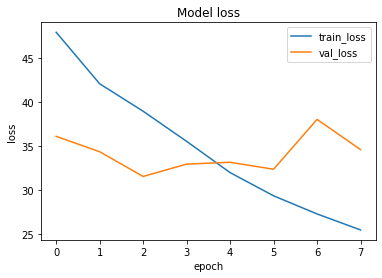

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

### FACIAL EXPRESSION DETECTION

**Categories**
- 0 - Angry
- 1 - Disgust
- 2 - Sad
- 3 - Happy
- 4 - Suprise

In [123]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv('C:/Users/dell/Desktop/Machine Learning/Project Emotion AI/1.2 Emotion AI Dataset/Emotion AI Dataset/icml_face_data.csv')

In [124]:
facialexpression_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [125]:
facialexpression_df[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

### Data wrangling and EDA

In [129]:
# function to convert pixel values in string format to array format
def string2array(x):
    return np.array(x.split(' ')).reshape(48,48,1).astype('float32')


In [130]:
# resize images from (48,48) to (96,96)
def resize(x):
    img = x.reshape(48,48)
    return cv2.resize(img, dsize=(96,96), interpolation = cv2.INTER_CUBIC)

In [131]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x : string2array(x))

In [132]:
facialexpression_df[' pixels'] =  facialexpression_df[' pixels'].apply(lambda x : resize(x))

In [133]:
facialexpression_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [134]:
facialexpression_df.shape

(24568, 2)

In [135]:
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [137]:
label_to_text = {0: 'anger', 1 : 'disgust', 2 : 'sad', 3 : 'happiness', 4: 'surprise'}

## Visualize Dataset

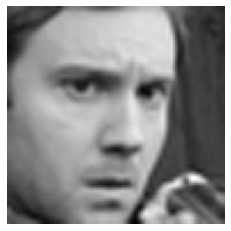

In [143]:
plt.axis('off')
plt.imshow(facialexpression_df[' pixels'][0],cmap = 'gray')
plt.show()

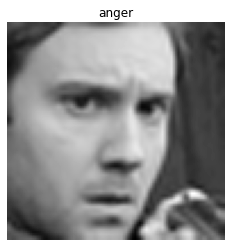

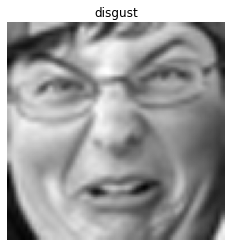

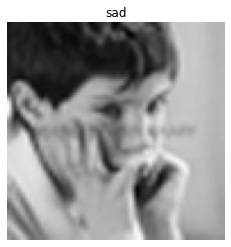

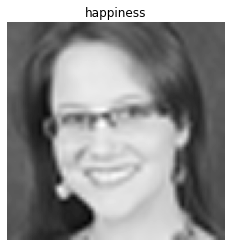

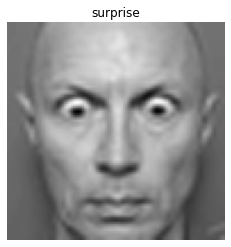

In [150]:
#visualize images and plot labels
emotions = [0,1,2,3,4]
for i in emotions:
    data = facialexpression_df[facialexpression_df['emotion']==i][:1]
  
    img = data[' pixels'].item()
    img = img.reshape(96, 96)
    
    plt.figure()
    plt.title(label_to_text[i])
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')

In [89]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [151]:
facialexpression_df.emotion.value_counts() # class 1 has lowest number of features

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

<AxesSubplot:ylabel='emotion'>

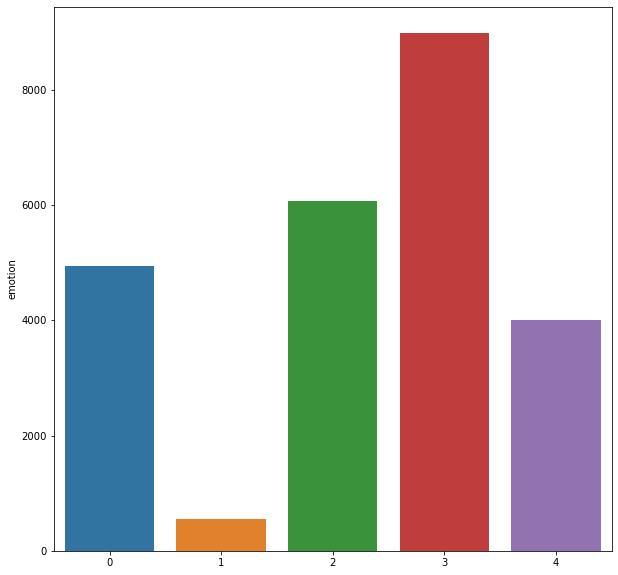

In [152]:
#facialexpression_df.emotion.value_counts().index
#facialexpression_df.emotion.value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index,y = facialexpression_df.emotion.value_counts() )

In [92]:
# we will do image augmentation on class 1 since it has very small features

In [155]:
facialexpression_df.head(10)

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."
5,3,"[[85.83263, 85.39513, 84.624954, 84.56122, 84...."
6,0,"[[30.493973, 28.719727, 25.83728, 22.809998, 2..."
7,3,"[[4.233185, 3.134613, 1.1965637, 2.8943634, 6...."
8,4,"[[107.0, 106.92969, 106.78906, 107.453125, 108..."
9,3,"[[13.766815, 13.718475, 13.597076, 14.411316, ..."


In [153]:
facialexpression_df.emotion.value_counts() # class 1 has lowest number of features

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

In [172]:
class1 = facialexpression_df.loc[facialexpression_df['emotion'] == 1]
class1.shape

(547, 2)

In [173]:
# split ddataframe in to feauters and labels
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

X = np.stack(X, axis = 0)
X = X.reshape(24568,96,96,1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [174]:
X

array([[[[ 6.93169250e+01],
         [ 7.30386505e+01],
         [ 7.91371918e+01],
         ...,
         [ 4.07361908e+01],
         [ 4.06584015e+01],
         [ 4.05393982e+01]],

        [[ 6.86632538e+01],
         [ 7.09522400e+01],
         [ 7.47176819e+01],
         ...,
         [ 4.32747650e+01],
         [ 4.20371857e+01],
         [ 4.12236176e+01]],

        [[ 6.77688141e+01],
         [ 6.77164612e+01],
         [ 6.76717224e+01],
         ...,
         [ 4.73947296e+01],
         [ 4.42632904e+01],
         [ 4.23146515e+01]],

        ...,

        [[ 7.48902130e+01],
         [ 7.67955322e+01],
         [ 7.99025879e+01],
         ...,
         [ 7.14634247e+01],
         [ 5.93287506e+01],
         [ 5.17473602e+01]],

        [[ 7.66812592e+01],
         [ 7.58081055e+01],
         [ 7.42545166e+01],
         ...,
         [ 9.39433746e+01],
         [ 7.97793427e+01],
         [ 7.11324615e+01]],

        [[ 7.76385803e+01],
         [ 7.51507416e+01],
         [

In [175]:

X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [176]:
X[0]

array([[[ 69.316925],
        [ 73.03865 ],
        [ 79.13719 ],
        ...,
        [ 40.73619 ],
        [ 40.6584  ],
        [ 40.5394  ]],

       [[ 68.66325 ],
        [ 70.95224 ],
        [ 74.71768 ],
        ...,
        [ 43.274765],
        [ 42.037186],
        [ 41.223618]],

       [[ 67.768814],
        [ 67.71646 ],
        [ 67.67172 ],
        ...,
        [ 47.39473 ],
        [ 44.26329 ],
        [ 42.31465 ]],

       ...,

       [[ 74.89021 ],
        [ 76.79553 ],
        [ 79.90259 ],
        ...,
        [ 71.463425],
        [ 59.32875 ],
        [ 51.74736 ]],

       [[ 76.68126 ],
        [ 75.808105],
        [ 74.25452 ],
        ...,
        [ 93.943375],
        [ 79.77934 ],
        [ 71.13246 ]],

       [[ 77.63858 ],
        [ 75.15074 ],
        [ 70.8846  ],
        ...,
        [107.66351 ],
        [ 92.23212 ],
        [ 82.91585 ]]], dtype=float32)

In [177]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

In [179]:
X_val.shape, y_val.shape

((1228, 96, 96, 1), (1228, 5))

In [180]:
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [181]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")


### Building Facial Expression Classifier

In [182]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [183]:
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [184]:

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [185]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data= (X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 2, callbacks=[checkpointer, earlystopping])

Epoch 1/2
345/345 [==============================] - ETA: 0s - loss: 1.2636 - accuracy: 0.4814
Epoch 00001: val_loss improved from inf to 1.53766, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 294s 852ms/step - loss: 1.2636 - accuracy: 0.4814 - val_loss: 1.5377 - val_accuracy: 0.2663
Epoch 2/2
345/345 [==============================] - ETA: 0s - loss: 0.9059 - accuracy: 0.6368
Epoch 00002: val_loss improved from 1.53766 to 0.98558, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 298s 864ms/step - loss: 0.9059 - accuracy: 0.6368 - val_loss: 0.9856 - val_accuracy: 0.6018


In [194]:
model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

Confusion Matrix, Accuracy, Precision, And Recall these are KPIs (Key Performance Indicator)

In [195]:
with open('C:/Users/dell/Desktop/Machine Learning/Project Emotion AI/1.2 Emotion AI Dataset/Emotion AI Dataset/emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('C:/Users/dell/Desktop/Machine Learning/Project Emotion AI/1.2 Emotion AI Dataset/Emotion AI Dataset/weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## Performance of the model

In [196]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 3s 64ms/step - loss: 0.3615 - accuracy: 0.8649
Test Accuracy: 0.8649308085441589


In [197]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

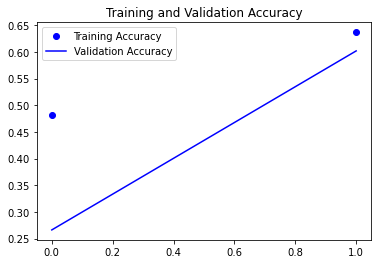

In [203]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

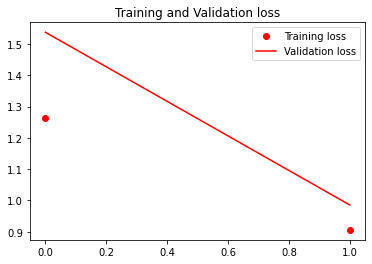

In [205]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [206]:
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

<AxesSubplot:>

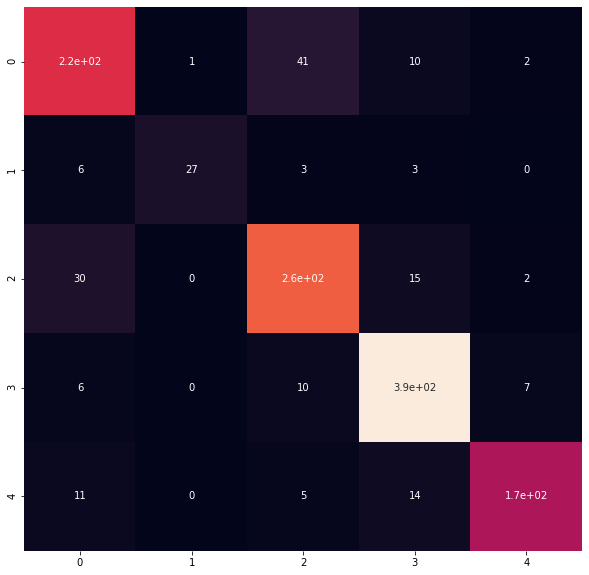

In [207]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

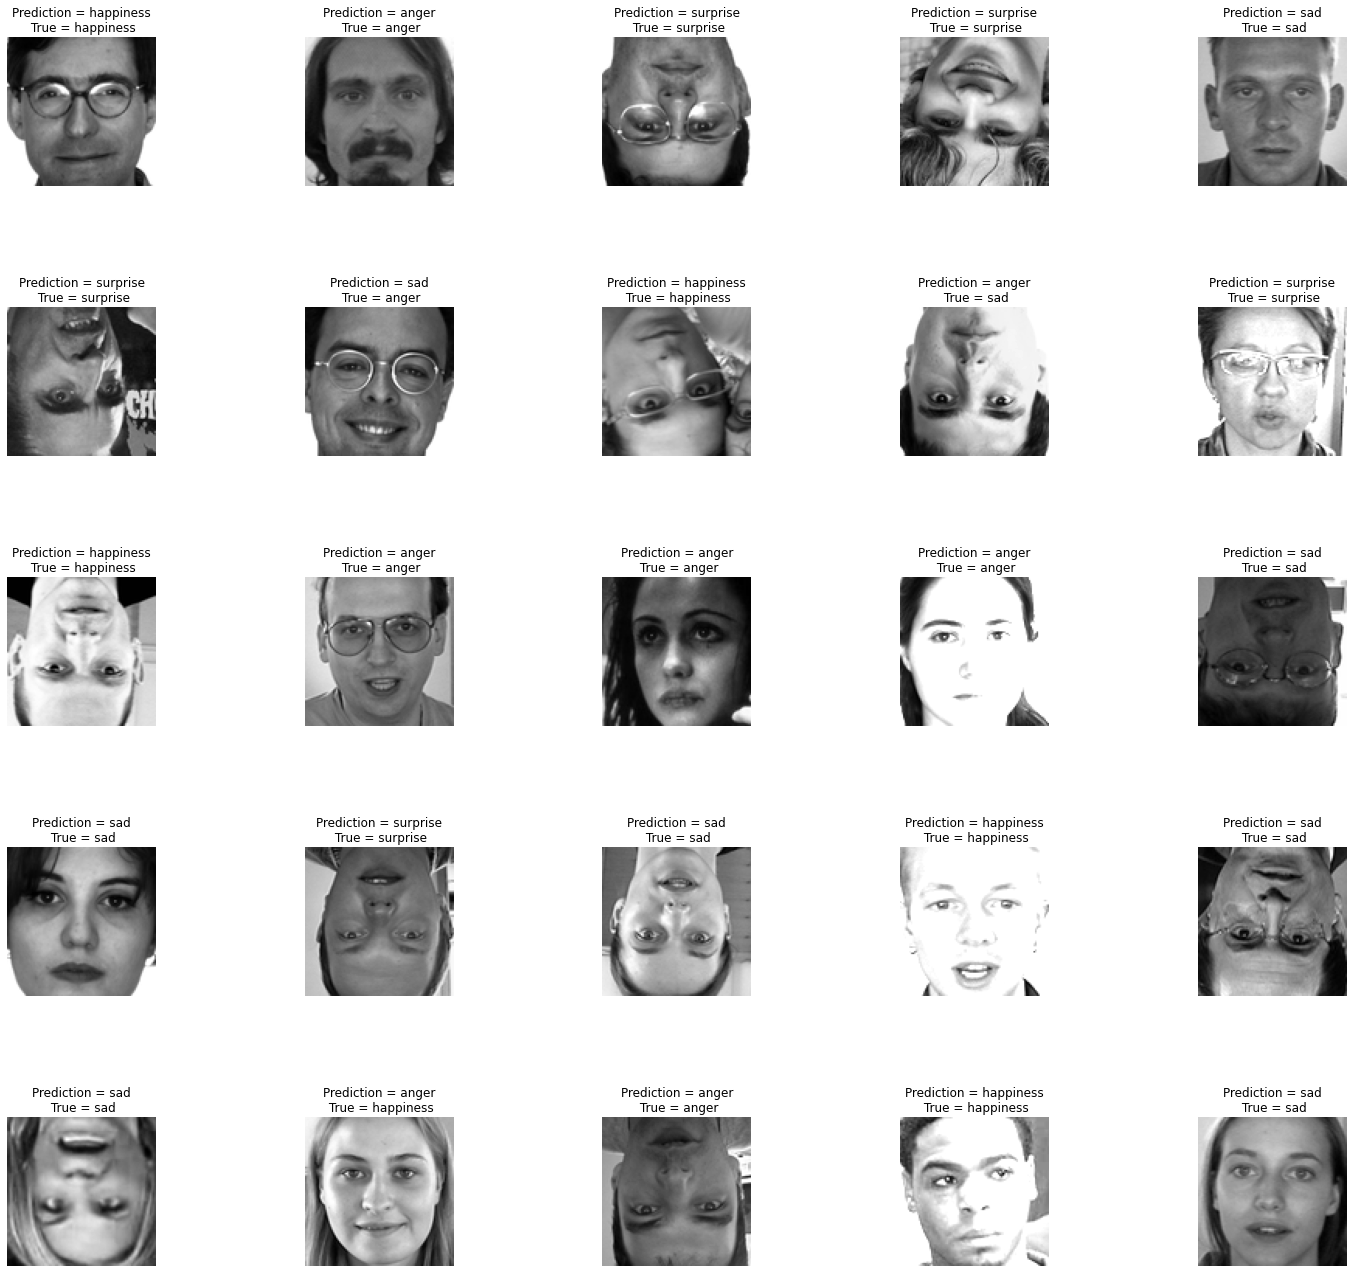

In [208]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       272
           1       0.96      0.69      0.81        39
           2       0.81      0.85      0.83       306
           3       0.90      0.94      0.92       414
           4       0.94      0.85      0.89       198

    accuracy                           0.86      1229
   macro avg       0.88      0.83      0.85      1229
weighted avg       0.87      0.86      0.86      1229



#### COMBINE BOTH FACIAL EXPRESSION AND KEY POINTS DETECTION MODELS

In [210]:
def predict(X_test):
    # making predictions from the keypoint model
    df_predict = model_1_facialKeyPoints.predict(X_test)
    
    # making predictions from emotion model
    df_emotion = np.argmax(model_2_emotion.predict(X_test), axis = 1)  #max prediction out of five o/ps
    
    # Reshapining array from (856,) to (856, 1)
    df_emotion = np.expand_dims(df_emotion, axis =1)
    
    # Converting the predictions into a dataframe
    df_predict = pd.DataFrame(df_predict, columns = columns)
    
    # adding emotions into the predicted dataframe
    df_predict['emotion'] = df_emotion
    
    return df_predict

In [211]:
X_test[0]

array([[[0.74509805],
        [0.1882353 ],
        [0.1254902 ],
        ...,
        [0.15294118],
        [0.14901961],
        [0.13333334]],

       [[0.6117647 ],
        [0.19607843],
        [0.12156863],
        ...,
        [0.15686275],
        [0.14901961],
        [0.14117648]],

       [[0.69803923],
        [0.1882353 ],
        [0.10980392],
        ...,
        [0.15686275],
        [0.14901961],
        [0.13725491]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.9882353 ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.84313726],
        [0.9764706 ],
        [1.        ]]], dtype=float32)

In [212]:
df_predict = predict(X_test)

In [213]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,66.457031,36.168919,28.332676,36.445473,59.229774,37.202744,73.901497,36.944016,35.574627,37.316021,...,56.852684,63.473740,75.786415,31.788172,76.073654,47.613186,72.418289,47.636150,82.663834,3
1,63.891747,36.201248,29.896057,36.499237,57.574657,37.210972,70.542786,36.999680,36.398907,37.403549,...,56.288734,61.289021,74.537277,32.936626,74.820480,47.189098,71.439713,47.215614,81.055389,2
2,65.231987,57.966362,29.258440,57.826412,58.342857,57.002628,72.432236,57.179409,36.161541,56.960842,...,38.190750,62.492298,19.954866,32.327568,19.681271,47.430370,22.954117,47.532429,13.223943,2
3,65.126930,58.223808,29.833448,58.125736,58.447243,57.218121,72.135490,57.422211,36.600437,57.229233,...,38.361164,62.375816,20.223196,32.886044,20.090723,47.639446,23.353394,47.698223,13.604437,2
4,64.148315,35.685146,28.929480,36.003750,57.496483,36.707745,71.072395,36.465237,35.590710,36.843712,...,55.747456,61.401760,73.904175,32.114407,74.174751,46.747982,70.766815,46.759369,80.468033,0


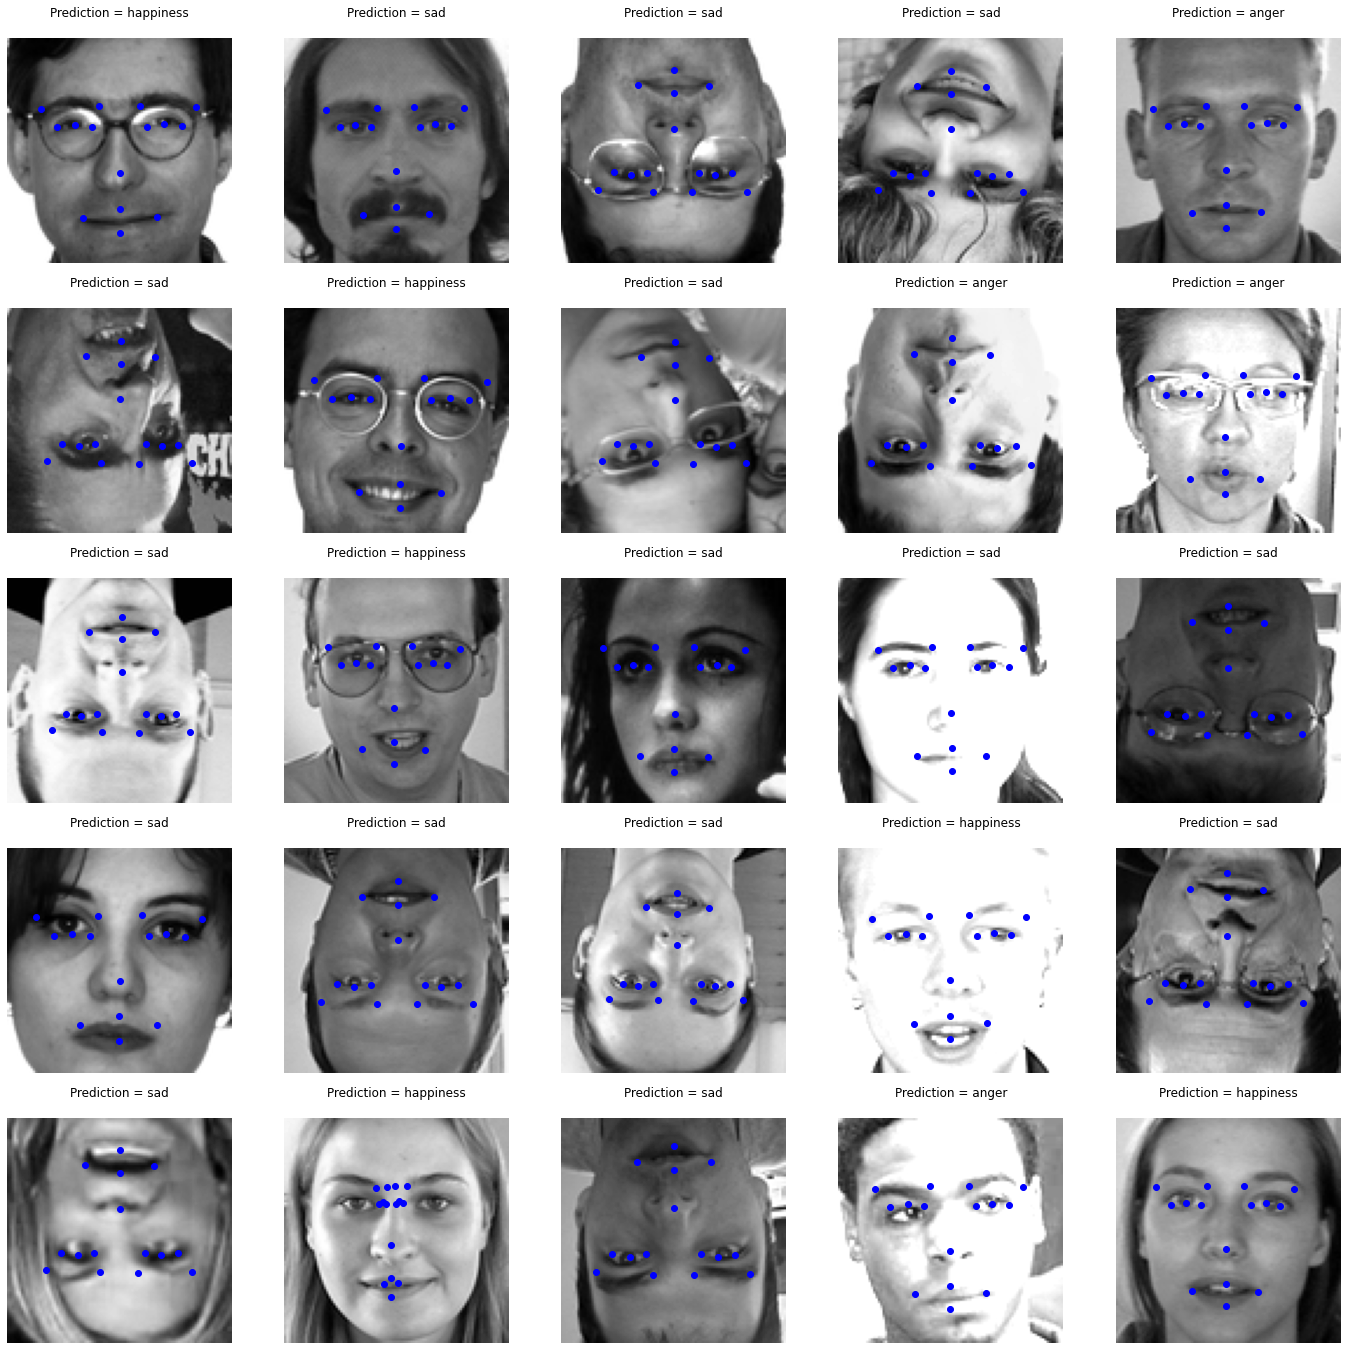

In [214]:
fig, axes = plt.subplots(5, 5, figsize = (24, 24))
axes = axes.ravel()
for i in range(25):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    #axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[df_predict['emotion'][i]], label_to_text[y_true[i]]))
    axes[i].set_title('Prediction = {}\n'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'bo')
            

### Gradcam Visualization

In [217]:
from PIL import Image, ImageOps

def grad_cam(img):

  #Covert the image to array of type float32
  img = np.asarray(img, dtype= np.float32)

  #Reshape the image from (96,96,1) to (1,96,96,1))
  img = img.reshape(-1,96,96,1)
  img_scaled = img / 255

  #Name of the layers we added to the base_model, you can find this in the model summaty
  #Every-time you run the model, check the summary, as the name would change or to avoid it 
  #you can add name to each layer
  classification_layers = ["Averagea_Pooling","Dense_final"]

  #Last convolutional layer in the base mdel, this woun't change as name has been already assigned to it.
  final_conv = model_2_emotion.get_layer("res_3_identity_2_c")

  #Create a model with original model input as input and the last conv_layer as the output
  final_conv_model = keras.Model(model_2_emotion.inputs, final_conv.output)

  #Then,we create the input for classification layer, which is the output of last conv layer
  #In our case, output produced by the conv layer is of the shape (1,2,2,1024) 
  #Since, the classification input needs the features as input, we ignore the batch dimension

  classification_input = keras.Input(shape=final_conv.output.shape[1:])

  # We iterate through the classification layers, to get the final layer and then, append 
  #the layer as the output layer to the classification model.
  temp = classification_input
  for layer in classification_layers:
      temp = model_2_emotion.get_layer(layer)(temp)
  classification_model = keras.Model(classification_input, temp)


  #We use gradient tape to monitor the 'final_conv_output' to retrive the gradients
  #corresponding to the predicted class
  with tf.GradientTape() as tape:
      # Pass the image through the base model and get the feature map 
      final_conv_output = final_conv_model(img_scaled)

      #Assign gradient tape to monitor the conv_output
      tape.watch(final_conv_output)
      
      #Pass the feature map through the classification model and use argmax to get the 
      #index of the predicted class and then use the index to get the value produced by final
      #layer for that class

      prediction = classification_model(final_conv_output)

      predicted_class = tf.argmax(prediction[0][0][0])

      predicted_class_value = prediction[:,:,:,predicted_class]

  #Get the gradient corresponding to the predicted class based on feature map.
  #which is of shape (1,2,2,1024)
  gradient = tape.gradient(predicted_class_value, final_conv_output)

  #Since we need the filter values (1024), we reduce the other dimensions, 
  #hich would result in a shape of (1024,)
  gradient_channels = tf.reduce_mean(gradient, axis=(0, 1, 2))

  #We then convert the feature map produced by last conv layer(1,2,2,1024) to (1,2,2,1024)

  final_conv_output = final_conv_output.numpy()[0]

  gradient_channels = gradient_channels.numpy()

  #We multiply the filters in the feature map produced by final conv layer by the 
  #filter values that are used to get the predicted class. By doing this we inrease the
  #value of areas that helped in making the prediction and lower the vlaue of areas, that 
  #did not contribute towards the final prediction
  for i in range(gradient_channels.shape[-1]):
      final_conv_output[:, :, i] *= gradient_channels[i]

  #We take the mean accross the channels to get the feature map
  heatmap = np.mean(final_conv_output, axis=-1)

  #Normalizing the heat map between 0 and 1, to visualize it
  heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

  # Rescaling and converting the type to int
  heatmap = np.uint8(255 * heatmap_normalized )


  # Create the colormap
  color_map = plt.cm.get_cmap('jet')

  # get only the rb features from the heatmap
  color_map = color_map(np.arange(256))[:, :3]
  heatmap = color_map[heatmap]

  #convert the array to image, resize the image and then convert to array
  heatmap = keras.preprocessing.image.array_to_img(heatmap)
  heatmap = heatmap.resize((96 ,96))
  heatmap = np.asarray(heatmap, dtype = np.float32)

  #take the value of heat map along any one channel as or image is of 1 channel
  heatmap = heatmap[:,:,2]
  heatmap = np.expand_dims(heatmap, axis = 2) 
 
  final_img =  (img[0]*0.4) + ((heatmap/255.0) * 0.8)
  final_img = keras.preprocessing.image.array_to_img(final_img)

  return final_img, heatmap_normalized

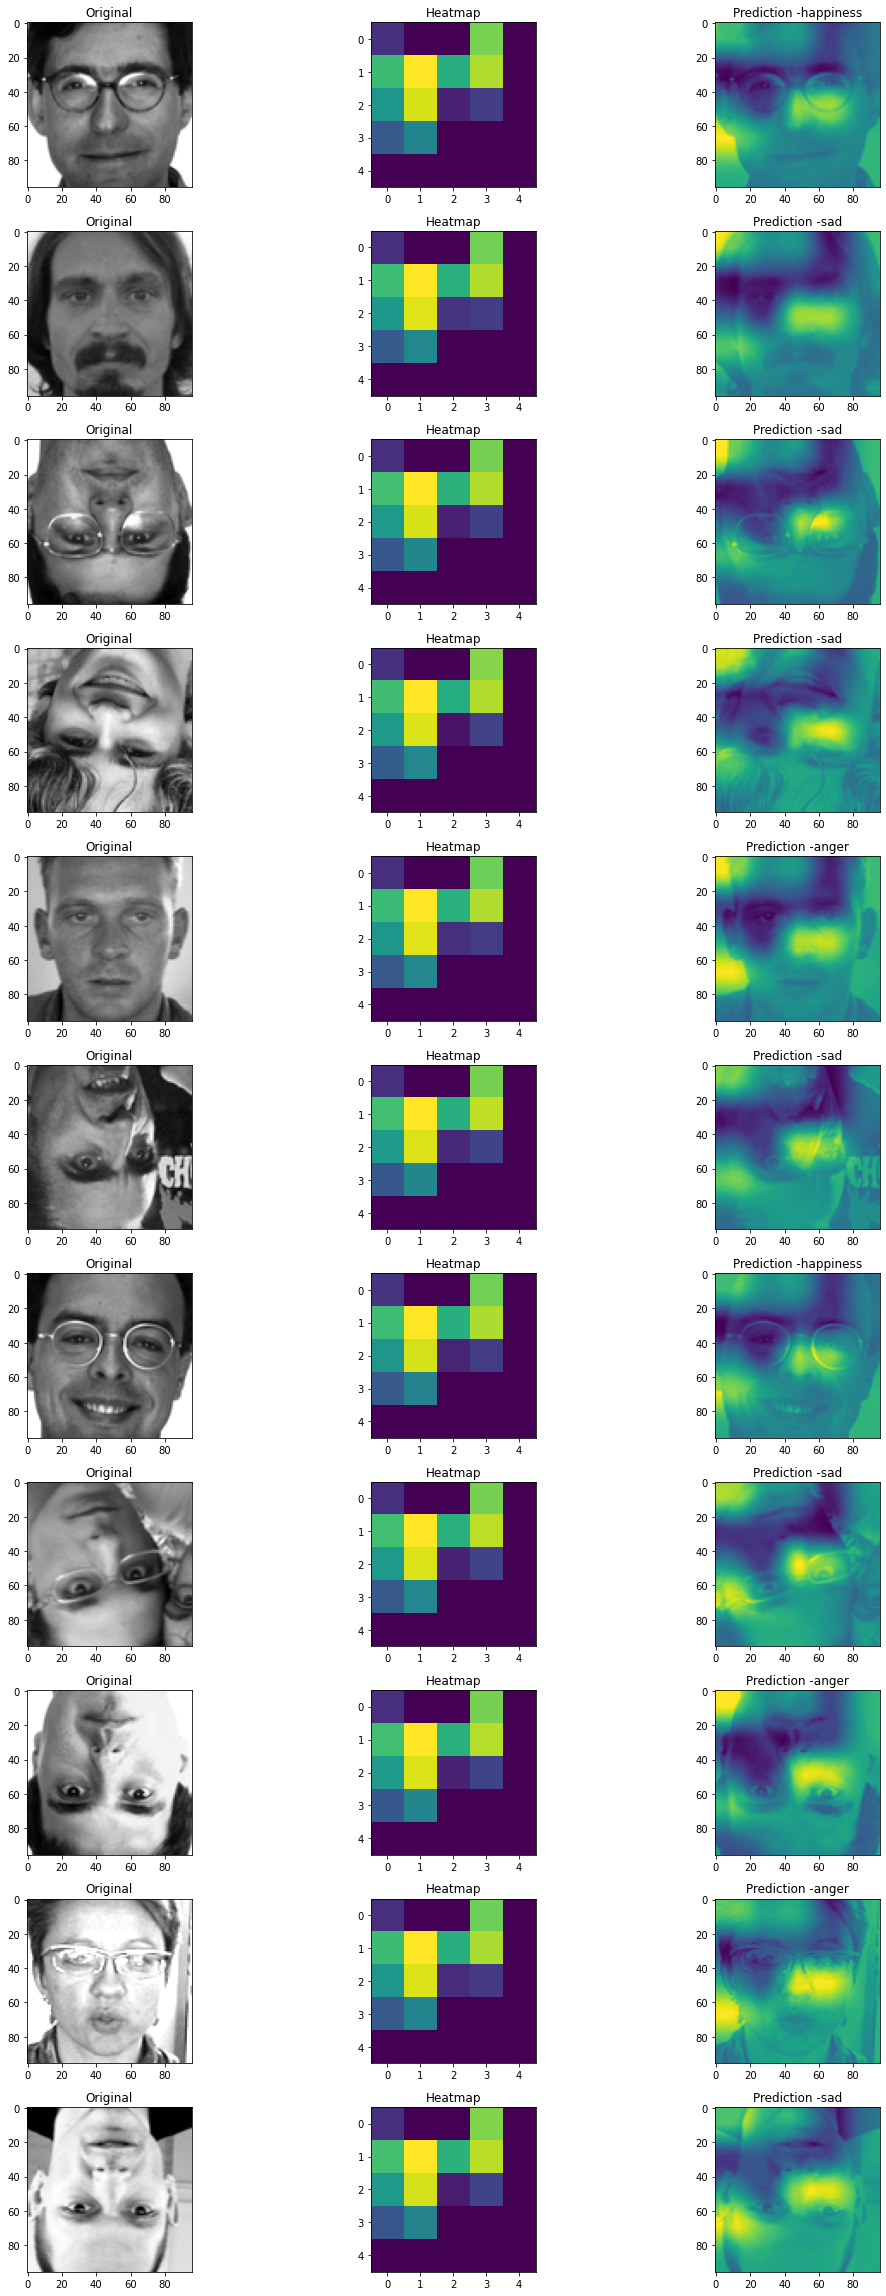

In [218]:
#Visualize the images in the dataset
import random
fig, axs = plt.subplots(11,3, figsize=(16,32))
count = 0
for i in range(11):
  #i = random.randint(0,len(X_test))
  gradcam, heatmap = grad_cam(X_test[i])
  axs[count][0].title.set_text("Original")
  axs[count][0].imshow(X_test[i].squeeze(),cmap = 'gray')
  axs[count][1].title.set_text("Heatmap") 
  axs[count][1].imshow(heatmap)
  axs[count][2].title.set_text("Prediction -" + label_to_text[df_predict['emotion'][i]]) 
  axs[count][2].imshow(gradcam)  
  count += 1

fig.tight_layout()